In [1]:
from keras.preprocessing import  sequence
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [2]:
import re 
def rm_tages(text):
    re_tag = re.compile(r'<[^>]+>')
    return re_tag.sub(' ',text)

import os
def read_files(filetype):
    path = 'C:/Users/Administrator/Desktop/data/aclImdb/'
    file_list = []
    
    positive_path = path + filetype + "/pos/"
    for f in os.listdir(positive_path):
        file_list += [positive_path + f]
        
    negative_path = path + filetype + "/neg/"
    for f in os.listdir(negative_path):
        file_list += [negative_path + f]
        
    print('read',filetype,'files:',len(file_list))
    
    all_labels = ([1] * 12500 + [0] * 12500)
    
    all_texts = []
    for fi in file_list:
        with open(fi,encoding='utf-8') as file_input:
            all_texts += [rm_tages(' '.join(file_input.readlines()))]
            
    return all_labels,all_texts

In [3]:
y_train,train_text = read_files("train")

y_test,test_text = read_files("test")

read train files: 25000
read test files: 25000


In [11]:
#建立token

token = Tokenizer(num_words=3800)
token.fit_on_texts(train_text)

In [12]:
x_train_seq = token.texts_to_sequences(train_text)
x_test_seq = token.texts_to_sequences(test_text)

In [13]:
x_train = sequence.pad_sequences(x_train_seq,maxlen=380)
x_test = sequence.pad_sequences(x_test_seq,maxlen=380)

In [18]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN,LSTM

In [10]:
model = Sequential()
model.add(Embedding(output_dim=32,
                    input_dim=3800,
                   input_length=380))
model.add(Dropout(0.35))
model.add(SimpleRNN(units=16))
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(units=1,activation='sigmoid'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 380, 32)           121600    
_________________________________________________________________
dropout_3 (Dropout)          (None, 380, 32)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               4352      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 126,993
Trainable params: 126,993
Non-trainable params: 0
_________________________________________________________________
None

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history = model.fit(x=x_train,y=y_train,validation_split=0.2,epochs=10,batch_size=100,verbose=2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 24s - loss: 0.5982 - acc: 0.6816 - val_loss: 0.5631 - val_acc: 0.7212
Epoch 2/10
 - 21s - loss: 0.3728 - acc: 0.8461 - val_loss: 0.7136 - val_acc: 0.6606
Epoch 3/10
 - 21s - loss: 0.3056 - acc: 0.8776 - val_loss: 0.4644 - val_acc: 0.8134
Epoch 4/10
 - 21s - loss: 0.2490 - acc: 0.9031 - val_loss: 0.5940 - val_acc: 0.7704
Epoch 5/10
 - 21s - loss: 0.2080 - acc: 0.9220 - val_loss: 0.7444 - val_acc: 0.7320
Epoch 6/10
 - 21s - loss: 0.1716 - acc: 0.9353 - val_loss: 0.5661 - val_acc: 0.8178
Epoch 7/10
 - 21s - loss: 0.1423 - acc: 0.9471 - val_loss: 0.7102 - val_acc: 0.7618
Epoch 8/10
 - 21s - loss: 0.1394 - acc: 0.9492 - val_loss: 0.6610 - val_acc: 0.7884
Epoch 9/10
 - 22s - loss: 0.1123 - acc: 0.9590 - val_loss: 1.0455 - val_acc: 0.7268
Epoch 10/10
 - 21s - loss: 0.0907 - acc: 0.9658 - val_loss: 0.8148 - val_acc: 0.7978


In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

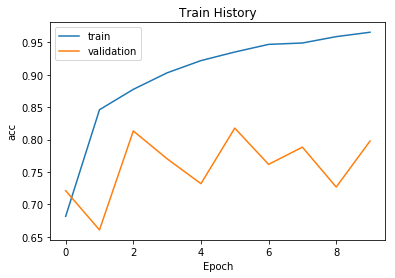

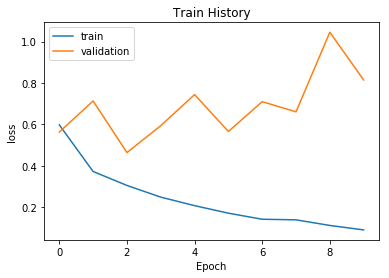

In [16]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [17]:
scores = model.evaluate(x_test,y_test)
print()
print('loss=',scores[0])
print('accuracy=',scores[1])

25000/25000 [==============================] - 16s 650us/step

loss= 0.6249255456233025
accuracy= 0.83784


In [19]:
model_v2 = Sequential()
model_v2.add(Embedding(output_dim=32,
                    input_dim=3800,
                   input_length=380))
model_v2.add(Dropout(0.35))
model_v2.add((LSTM(32)))
model_v2.add(Dense(units=256,activation='relu'))
model_v2.add(Dropout(0.35))
model_v2.add(Dense(units=1,activation='sigmoid'))

print(model_v2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 380, 32)           121600    
_________________________________________________________________
dropout_5 (Dropout)          (None, 380, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 138,625
Trainable params: 138,625
Non-trainable params: 0
_________________________________________________________________
None

In [20]:
model_v2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history = model_v2.fit(x=x_train,y=y_train,validation_split=0.2,epochs=10,batch_size=100,verbose=2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 63s - loss: 0.5070 - acc: 0.7416 - val_loss: 0.3479 - val_acc: 0.8504
Epoch 2/10
 - 59s - loss: 0.2928 - acc: 0.8810 - val_loss: 0.4612 - val_acc: 0.8280
Epoch 3/10
 - 59s - loss: 0.2438 - acc: 0.9055 - val_loss: 0.5071 - val_acc: 0.7886
Epoch 4/10
 - 62s - loss: 0.2070 - acc: 0.9209 - val_loss: 0.4275 - val_acc: 0.8118
Epoch 5/10
 - 59s - loss: 0.1934 - acc: 0.9270 - val_loss: 0.4637 - val_acc: 0.8122
Epoch 6/10
 - 59s - loss: 0.1812 - acc: 0.9323 - val_loss: 0.5427 - val_acc: 0.7972
Epoch 7/10
 - 61s - loss: 0.1680 - acc: 0.9375 - val_loss: 0.3514 - val_acc: 0.8620
Epoch 8/10
 - 65s - loss: 0.1511 - acc: 0.9456 - val_loss: 0.6119 - val_acc: 0.7898
Epoch 9/10
 - 64s - loss: 0.1361 - acc: 0.9502 - val_loss: 0.5000 - val_acc: 0.8426
Epoch 10/10
 - 59s - loss: 0.1274 - acc: 0.9536 - val_loss: 0.5152 - val_acc: 0.8548


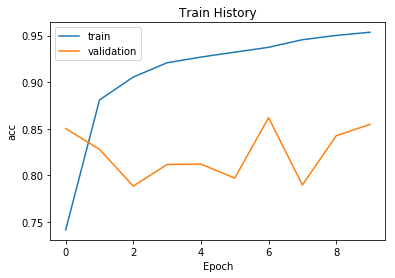

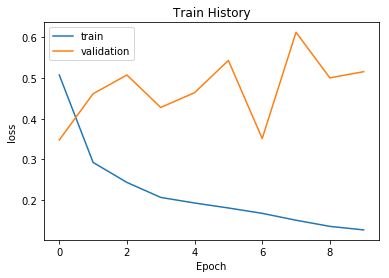

In [21]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [23]:
scores = model_v2.evaluate(x_test,y_test)
print()
print('loss=',scores[0])
print('accuracy=',scores[1])

25000/25000 [==============================] - 31s 1ms/step

loss= 0.4628422758162022
accuracy= 0.86304
